In [18]:
import pandas as pd 
import numpy as np 
# import pmdarima as pm 
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA


In [19]:
df = pd.read_excel('../../dataset/buku.xlsx',index_col='tanggal',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (355, 5)


,invoice,nama buku,jumlah beli,harga,total harga
tanggal,,,,,
2020-03-12,101,10 cerita teladan,3,5277,15831
2020-03-13,102,100 Hadits Qudsi,3,6180,18540
2020-03-14,103,125 Ilmuwan Islam Pengukir Sejarah,4,8937,35748
2020-03-15,104,20 Rahasia Alami Obat Tradisional Nusantara,4,6922,27688
2020-03-16,105,33 Kiat Menuju Kekhusyuan Shalat,4,5277,21108


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 355 entries, 2020-03-12 to 2021-03-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jumlah beli  355 non-null    int64
 1   harga        355 non-null    int64
 2   total harga  355 non-null    int64
dtypes: int64(3)
memory usage: 11.1 KB


In [21]:
df= df.drop(['invoice','nama buku'],axis=1)
df

,jumlah beli,harga,total harga
tanggal,,,
2020-03-12,3,5277,15831
2020-03-13,3,6180,18540
2020-03-14,4,8937,35748
2020-03-15,4,6922,27688
2020-03-16,4,5277,21108
...,...,...,...
2021-02-25,5,7014,35070
2021-02-26,1,7013,7013
2021-02-27,4,5226,20904


<AxesSubplot: xlabel='tanggal'>

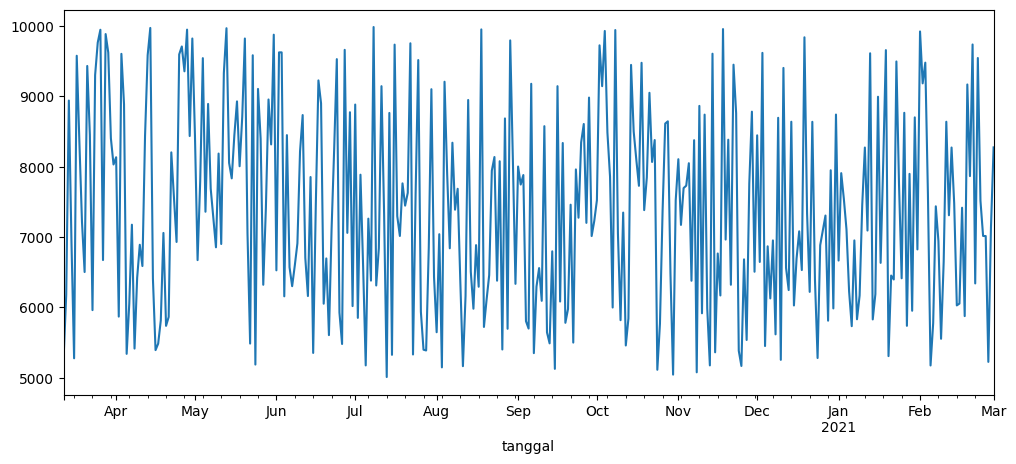

In [22]:
df['harga'].plot(figsize=(12,5))

In [43]:
 from statsmodels.tsa.stattools import  adfuller
def ad_test(dataset):
    dftest= adfuller(dataset, autolag= 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value :",dftest[1])
    print( "3. NUm of Lags :", dftest[2])
    print("4. Num of Observations used for ADF Regression and critical values calculation: ", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":", val)  

#Ho: It is non stationary
#H1: It is stationary

# def ad_test(dataset):
#     result=adfuller(dataset)
#     labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#     for value,label in zip(result,labels):
#         print(label+' : '+str(value) )
#     if result[1] <= 0.05:
#         print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
#     else:
#         print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [44]:
ad_test(df['harga'])

1. ADF:  -12.385716724827322
2. P-Value : 4.9147628108178415e-23
3. NUm of Lags : 1
4. Num of Observations used for ADF Regression and critical values calculation:  353
5. Critical Values:
	 1% : -3.4490114443793214
	 5% : -2.8697627072503757
	 10% : -2.5711506161673716


In [40]:
from pmdarima import  auto_arima

import warnings
warnings.filterwarnings("ignore")


In [41]:
stepwise_fit = auto_arima(df['harga'], start_p=1, start_q=1, max_p=100, max_q=100, seasonal=False)

stepwise_fit

ARIMA(order=(6, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
from statsmodels.tsa.arima.model import ARIMA


In [28]:
print(df.shape)
train= df.iloc[:-30]
test= df.iloc[-30:]
print(train.shape,test.shape)

(355, 3)
(325, 3) (30, 3)


In [29]:
model = ARIMA(train['harga'],order=(6,0,11))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  harga   No. Observations:                  325
Model:                ARIMA(6, 0, 11)   Log Likelihood               -2810.098
Date:                Sat, 24 Jun 2023   AIC                           5658.196
Time:                        10:30:53   BIC                           5730.089
Sample:                    03-12-2020   HQIC                          5686.889
                         - 01-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7402.7503    253.573     29.194      0.000    6905.757    7899.744
ar.L1         -0.5142      0.234     -2.197      0.028      -0.973      -0.056
ar.L2          0.0663      0.145      0.457      0.648      -0.218       0.350
ar.L3          0.0094      0.110      0.085      0.932      -0.207       0.226
ar.L4         -0.0319      0.120     -0.265      0.791      -0.268       0.204
ar.L5          0.5048      0.128      3.939      0.000       0.254       0.756
ar.L6          0.9633      0.230      4.195      0.000       0.513       1.413
ma.L1          0.4954      0.299      1.658      0.097      -0.090       1.081
ma.L2          0.0096      0.213      0.045      0.964      -0.407       0.426
ma.L3          0.0822      0.210      0.392      0.695      -0.329       0.493
ma.L4          0.1334      0.184      0.725      0.469      -0.227       0.494
ma.L5         -0.4026      0.232     -1.733      0.083      -0.858       0.053
ma.L6         -0.9589      0.288     -3.324      0.001      -1.524      -0.394
ma.L7         -0.0301      0.074     -0.406      0.685      -0.176       0.115
ma.L8         -0.0505      0.076     -0.667      0.505      -0.199       0.098
ma.L9         -0.0994      0.073     -1.355      0.175      -0.243       0.044
ma.L10        -0.1257      0.077     -1.637      0.102      -0.276       0.025
ma.L11        -0.0423      0.062     -0.683      0.495      -0.164       0.079
sigma2       1.87e+06      0.010    1.9e+08      0.000    1.87e+06    1.87e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.33
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.07
Prob(H) (two-sided):                  0.15   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.29e+24. Standard errors may be unstable.
"""

<AxesSubplot: xlabel='tanggal'>

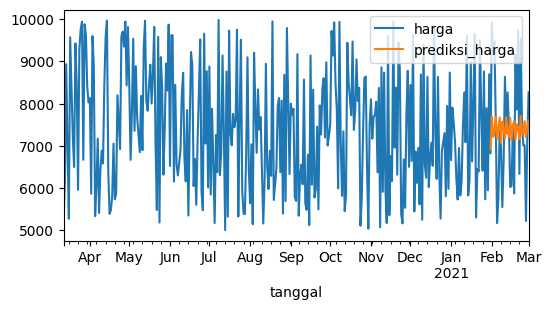

In [47]:
df['prediksi_harga']=model.predict(start=start,end=end,dynamic=True)
df[['harga','prediksi_harga']].plot(figsize=(6,3))

In [48]:
import statsmodels.api as sm

In [55]:
model=sm.tsa.statespace.SARIMAX(df['harga'],order=(6, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot: xlabel='tanggal'>

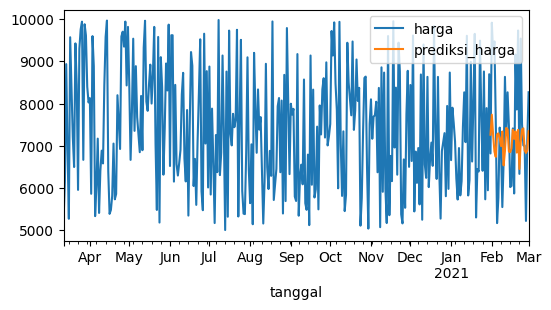

In [57]:
df['prediksi_harga']=results.predict(start=start,end=end,dynamic=True)
df[['harga','prediksi_harga']].plot(figsize=(6,3))

In [54]:
from sklearn.metrics import mean_squared_error
from math import  sqrt
rmse=sqrt(mean_squared_error(pred,test['harga']))
print(rmse)

1331.521044158171


In [35]:
# model2=ARIMA(df['harga',order=()])

df.tail()

,jumlah beli,harga,total harga
tanggal,,,
2021-02-25,5,7014,35070
2021-02-26,1,7013,7013
2021-02-27,4,5226,20904
2021-02-28,2,7139,14278
2021-03-01,2,8272,16544


In [58]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [59]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [60]:
future_datest_df.tail()

,jumlah beli,harga,total harga,prediksi_harga
2022-10-01,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN


In [61]:
future_df=pd.concat([df,future_datest_df])

In [62]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot: >

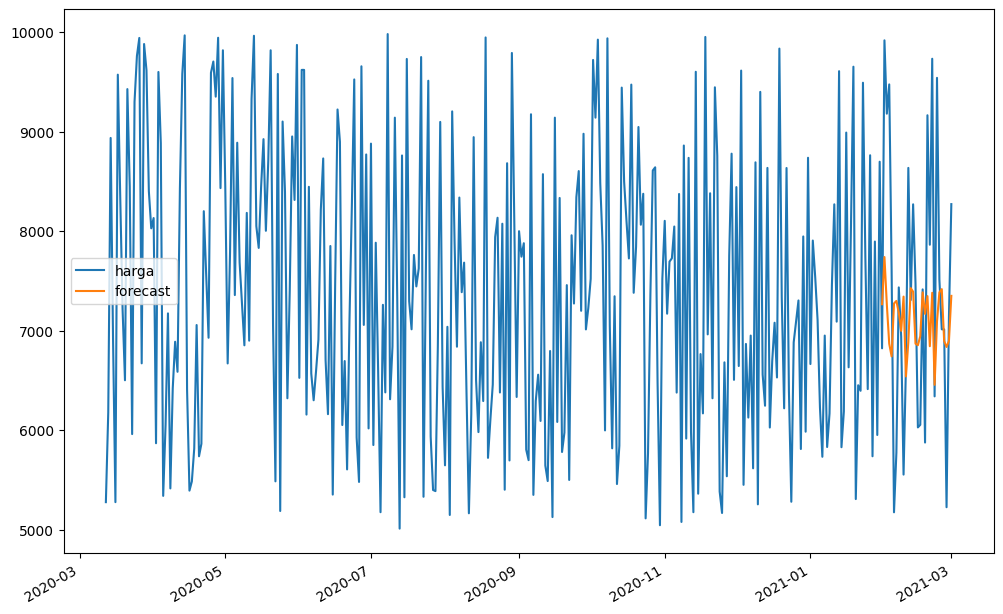

In [63]:
future_df['forecast'] = results.predict(start = start, end = end, dynamic= True)  
future_df[['harga', 'forecast']].plot(figsize=(12, 8)) 